# Face Detection
## 1. Object Dection - Cascade Classifier(Viola-Jones)
## 2. Deep Neural Networks
## 3. 1+2


In [1]:
import cv2
import numpy as np

In [2]:
def detectAndDisplay(frame):
    # 정확도 향상을 위한 Gray Scale로 변환
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    # detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    # x y좌표 w h넓이 높이(얼굴 영역)
    for (x,y,w,h) in faces :
        center = (x + w//2, y + h//2)
        frame = cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 4)
        faceROI = frame_gray[y:y+h, x:x+w]
        # detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        # x y좌표 w h넓이 높이(눈 영역)
        for (x2,y2,w2,h2) in eyes :
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0),4)
        cv2.imshow('Capture - Face detection', frame)

In [4]:
# 눈, 얼굴 인식 실패하는 경우 있음
img = cv2.imread("D:/opencv_dnn_202005/opencv_dnn_202005/image/marathon_01.jpg")
# img = cv2.imread("D:/opencv_dnn_202005/opencv_dnn_202005/image/marathon_02.jpg")

print("width : {} pixels".format(img.shape[1]))
print("height : {} pixels".format(img.shape[0]))
print("channels : {} pixels".format(img.shape[2]))

(height, width) = img.shape[:2]
cv2.imshow("Original",img)

# .xml에 이미 저장되어 있는 정보를 통해 detect 하지만 여기에 없는 정보들이 들어왔을 때 정확도가 떨어짐
face_cascade_name = 'C:/Users/User/Anaconda3/envs/test/Lib/site-packages/cv2/data/haarcascade_frontalface_alt.xml'
eyes_cascade_name = 'C:/Users/User/Anaconda3/envs/test/Lib/site-packages/cv2/data/haarcascade_eye_tree_eyeglasses.xml'

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()

# 예외처리
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv2.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)

detectAndDisplay(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

width : 1024 pixels
height : 799 pixels
channels : 3 pixels


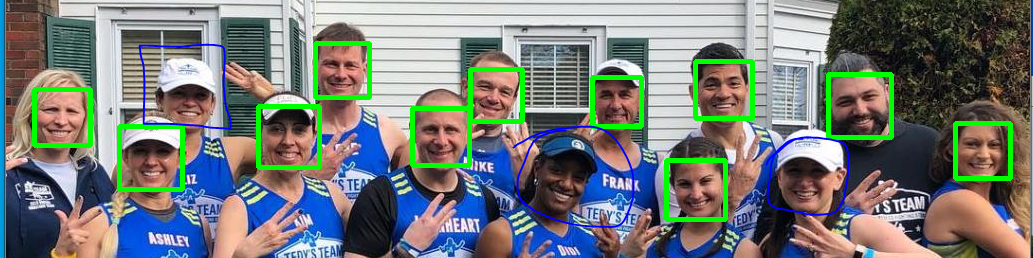